# Collecting Data

# importing libraries and loading dataset

In [94]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import math
import matplotlib.pyplot as plt

dataset=pd.read_csv('C:/Users/91977/DATASETS_CSV/Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


# exploring dataset

In [95]:
print('# of Purchsed in original data:'+str(len(dataset.index)))

# of Purchsed in original data:400


In [96]:
dataset.shape

(400, 5)

# Analysing Data

# visualizing data: how many employees purchased the SUV

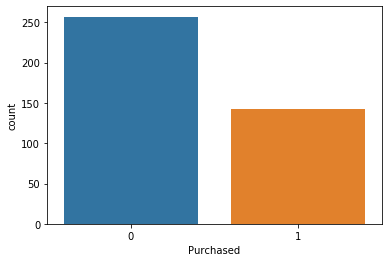

In [97]:
sns.countplot(x='Purchased',data=dataset)

# purchase SUV with respect to gender

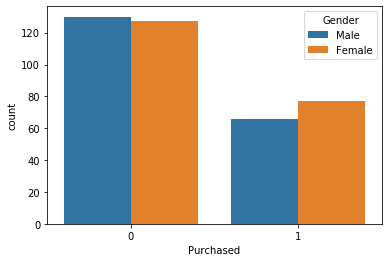

In [98]:
sns.countplot(x='Purchased',data=dataset,hue='Gender')

# visualise AGE

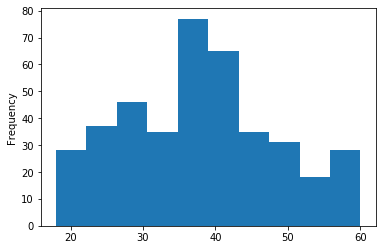

In [99]:
dataset['Age'].plot.hist()

# reviewing estimated_salary

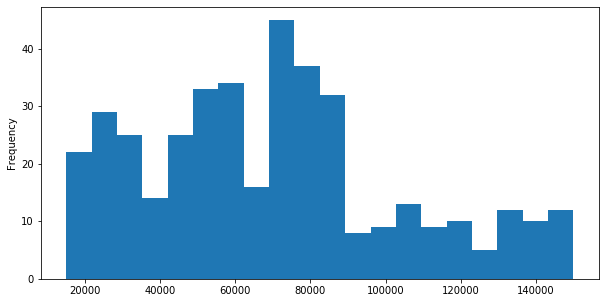

In [100]:
dataset['EstimatedSalary'].plot.hist(bins=20,figsize=(10,5))

# Data Wrangling

# checking missing values

In [101]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [102]:
dataset['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

# checking missing values in heatmap

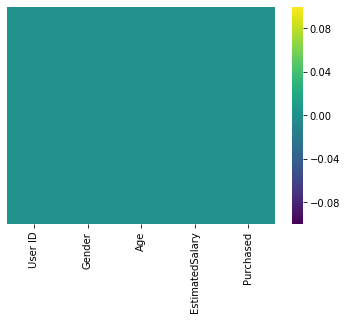

In [103]:
sns.heatmap(dataset.isnull(),yticklabels=False,cmap='viridis')

# making dummy column of gender

In [104]:
sex=pd.get_dummies(dataset['Gender'],drop_first=True)
sex

,Male
0,1
1,1
2,0
3,0
4,1
...,...
395,0
396,1
397,0
398,1


# concatenating the dummy column with the dataset

In [105]:
dataset=pd.concat([dataset,sex],axis=1)
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,0
396,15706071,Male,51,23000,1,1
397,15654296,Female,50,20000,1,0
398,15755018,Male,36,33000,0,1


In [106]:
dataset.drop(['Gender','User ID'],axis=1,inplace=True)

# TRAINING DATA

# splitting the data into x and y

In [107]:
x=dataset.drop('Purchased',axis=1)
y=dataset['Purchased']

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25)

In [110]:
from sklearn.preprocessing import StandardScaler

# using standard scaler for normalization of data

In [111]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# LOGISTIC REGRESSION

In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [114]:
y_pred=classifier.predict(x_test)

# ACCURACY SCORE

In [115]:
from sklearn.metrics import accuracy_score

In [116]:
accuracy_score(y_test,y_pred)*100

83.0

In [117]:
from sklearn.metrics import classification_report

In [118]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.85      0.89      0.87        63\n           1       0.79      0.73      0.76        37\n\n    accuracy                           0.83       100\n   macro avg       0.82      0.81      0.81       100\nweighted avg       0.83      0.83      0.83       100\n'

# CONFUSION METRICS

In [119]:
from sklearn.metrics import confusion_matrix

In [120]:
confusion_matrix(y_test,y_pred)

array([[56,  7],
       [10, 27]], dtype=int64)